# SW_DutchCoast

Validate MIKE 21 Spectral wave model for the Dutch coast.

In [1]:
import os
import modelskill as ms

In [2]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')

In [3]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ms.ModelResult(fn, name='HKZN_local', item=0)
mr.data

Dfsu2D
number of elements: 958
number of nodes: 570
projection: LONG/LAT
number of items: 15
time: 23 steps with dt=10800.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

## Define observations

In [4]:
o1 = ms.PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")

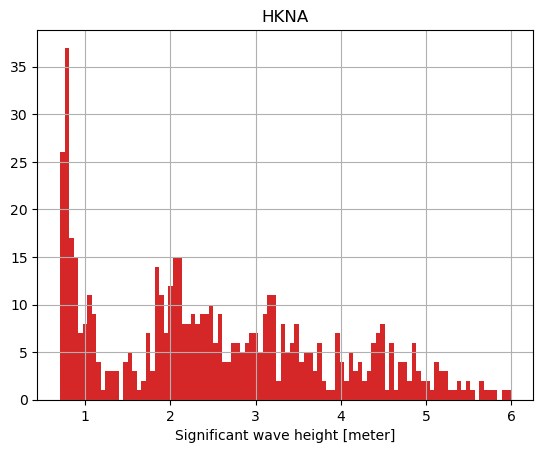

In [5]:
o1.plot.hist();

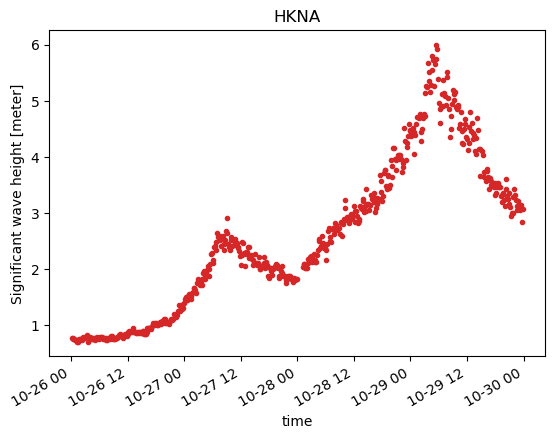

In [6]:
o1.plot(); 

In [7]:
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
o3.data.head()

<xarray.Dataset>
Dimensions:  (time: 5)
Coordinates:
  * time     (time) datetime64[ns] 2017-10-27T12:52:52.337000 ... 2017-10-27T...
    x        (time) float64 2.423 2.414 2.405 2.396 2.387
    y        (time) float64 51.25 51.31 51.37 51.42 51.48
    z        float64 nan
Data variables:
    c2       (time) float64 1.638 1.383 1.791 1.7 1.8
Attributes:
    gtype:    track

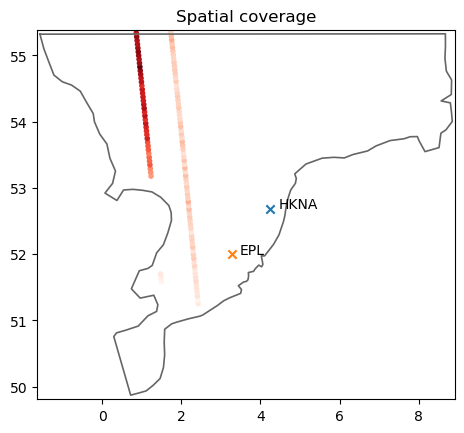

In [8]:
ms.plotting.spatial_overview([o1, o2, o3], mr);

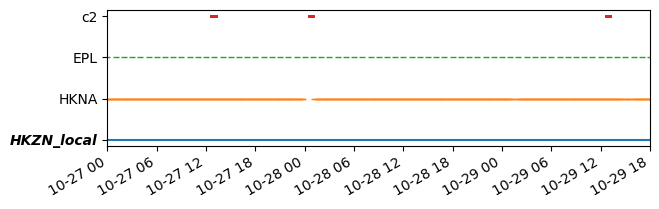

In [9]:
ms.plotting.temporal_coverage([o1, o2, o3], mr);

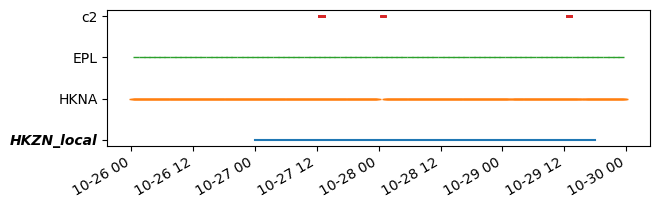

In [10]:
ms.plotting.temporal_coverage([o1, o2, o3], mr, limit_to_model_period=False);

## Compare observations and model result

In [11]:
cc = ms.compare([o1, o2, o3], mr)

# Save the comparison to a file

Extracting model results¶ can be a time-consuming process. Therefore, it is recommended to save the results to a file. This can be done using the save method of the comparison object.

Each comparer can be saved as a NetCDF file, and a `ComparerCollection` can be saved as a zip file, preferably with the extension `.msk`.

In [12]:
cc.save("SW_DutchCoast.msk")

In [13]:
cc2 = ms.load("SW_DutchCoast.msk")
cc2

<ComparerCollection>
Comparer: c2
Comparer: EPL
Comparer: HKNA

In [14]:
cc.skill().style()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,67,-0.067,0.224,0.213,0.189,0.970,0.083,0.933
HKNA,386,-0.194,0.352,0.293,0.252,0.971,0.094,0.905
c2,113,-0.001,0.352,0.352,0.295,0.974,0.128,0.900


In [15]:
cc["c2"].skill(metrics="mean_absolute_error")

,n,mean_absolute_error
observation,,
c2,113,0.294585


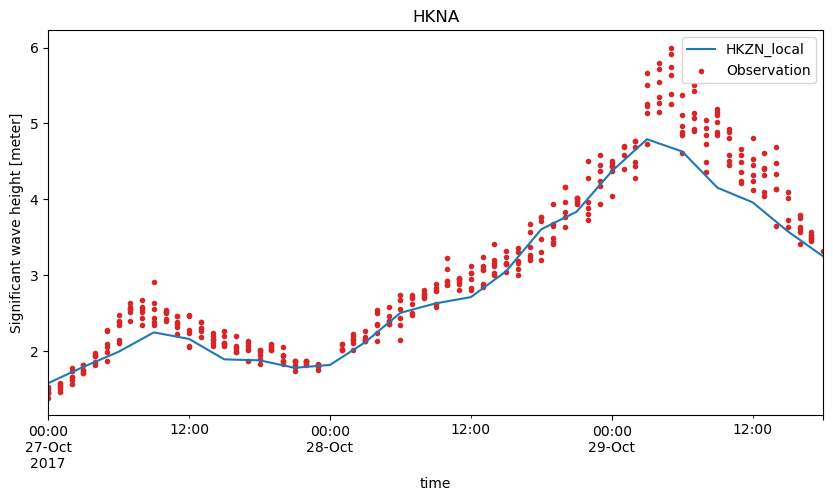

In [16]:
cc["HKNA"].plot.timeseries(figsize=(10,5));

In [17]:
cc["HKNA"].plot.timeseries(width=1000, backend="plotly")

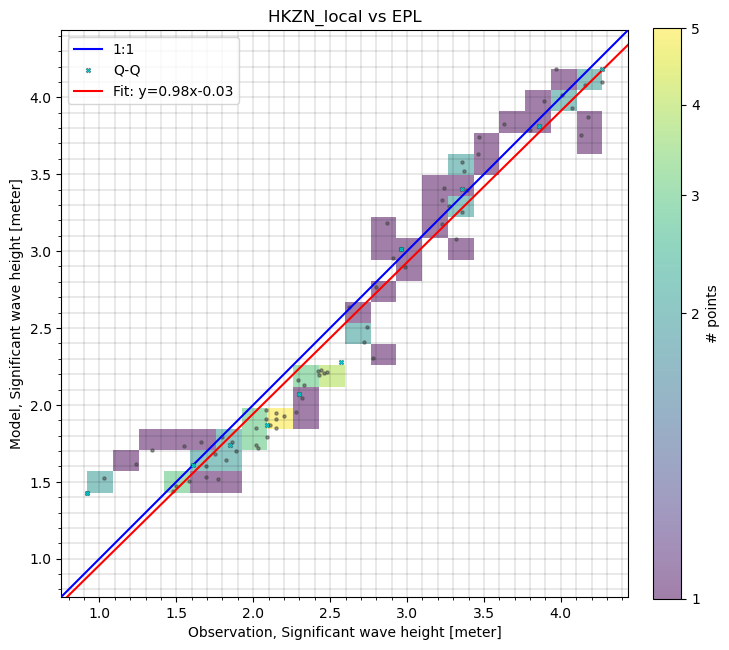

In [18]:
cc["EPL"].plot.scatter(figsize=(8,8), show_hist=True); 

In [19]:
cc["EPL"].plot.scatter(show_hist=True, backend='plotly', width=600, height=600); #,xlim=[-1,11])

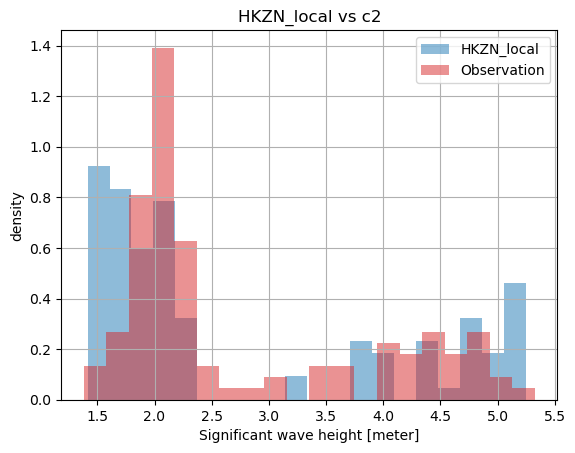

In [20]:
cc["c2"].plot.hist(bins=20);

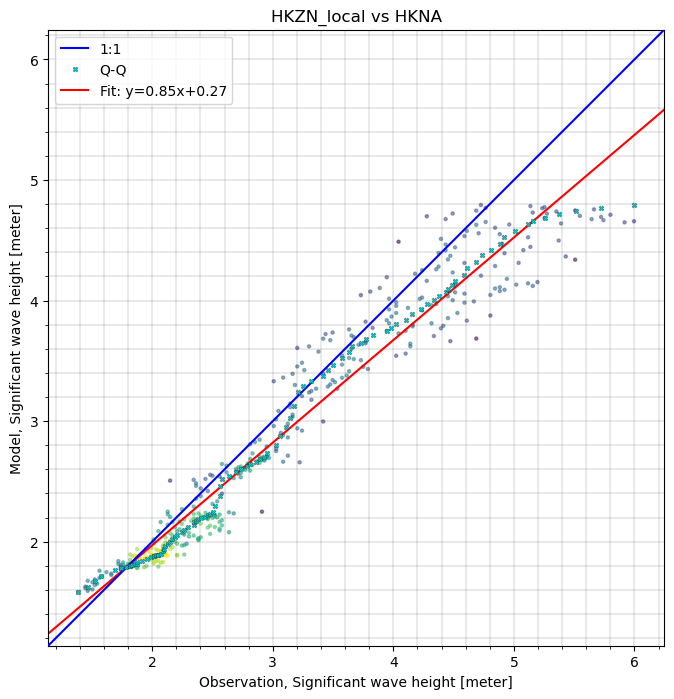

In [21]:
cc["HKNA"].plot.scatter(bins=0.25, cmap="viridis");

### Clean up

In [22]:
os.remove("SW_DutchCoast.msk")